In [1]:
import pickle 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

import nltk
from gensim.models import KeyedVectors
nltk.download('punkt')
 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ishan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
data = pd.read_csv("data/capitals.txt", delimiter = ' ')
data.columns = ['city1', 'country1', 'city2' , 'country2']
# print first five elements in the department 
data.head(5)

,city1,country1,city2,country2
0,Athens,Greece,Bangkok,Thailand
1,Athens,Greece,Beijing,China
2,Athens,Greece,Berlin,Germany
3,Athens,Greece,Bern,Switzerland
4,Athens,Greece,Cairo,Egypt


In [5]:
data.shape

(4951, 4)

In [6]:
embeddings = KeyedVectors.load_word2vec_format('data/GoogleNews-vectors-negative300.bin.gz', binary=True)
f = open('data/capitals.txt','r').read()
set_words = set(nltk.word_tokenize(f))
select_words = words = ['King', 'queen', 'oil', 'gas', 'happy', 'sad' , 'city' , 'town', 'village', 'country', 'continient', 'petroleum', 'joyful']

for w in select_words:
    set_words.add(w)



In [7]:
def get_word_embeddings(embeddings):
    word_embeddings = {}
    for word in embeddings.key_to_index:
        if word in set_words:
            word_embeddings[word] = embeddings[word]
    return word_embeddings
    
# testing the function 
word_embeddings = get_word_embeddings(embeddings)
print(len(word_embeddings))


242


In [8]:
pickle.dump( word_embeddings, open( "word_embeddings_subset.p", "wb" ) )

Now we will load the word embeddings as a python dictionary. As stated these have already been obtained through a machine learning algorithm. 

In [9]:
word_embeddings = pickle.load(open("data/word_embeddings_subset.p", "rb"))
len(word_embeddings)

243

Each of the word embedding is a 300 dimensional vector. 

In [10]:
print("dimension: {}".format(word_embeddings['Spain'].shape[0]))

dimension: 300


Now you will write a function that will use the word embeddings topredict relationships among words. 

The input will take as input three words.
The first two are related to each other. 
It will predict a 4th word which is related to third word in a similar manner as the two first two words are related to each other. 
As an example,"Athens is to Greece as Bangkok is to __"?
You wiull write a program that is capable of finding the fourth word. 
We will give you a hint to show how to compute this. 

A smimilar analogy would be the following:
IN chess:
king - man + woman = queen 


The cosine Similarity function is:
cos(theta)A.B/||A||||B|| = sumation of (prodcut) of AB)/ root of sqaure A product squatre  root of B 

A and B represent the word vectors and A or B represent index I of the vector. Note that if A and B are identical, you will get cos(theta) = 1. 

otherwise if they are the opposite, meainng, A = -B, then you would get cos(theta) = -1
if you get cos(theta) = 0 , that means that they are orthogonal (or perpendicular). 
Numbers between 0 and 1 indicates a similarity score. 
Numbers between -1 and 0 indicates a dissimilarity score. 






# Excercise 1 Cosine_Similarity

implement a function that takes in two word vectors and computes the cosine distance. 


In [11]:
def cosine_similarity(A,B):
    '''Input:
            A: a numpy array which corresponds to a word vector
            B: A numpy array which correcsponds to a word vector
        Output:
            cos: numerical number representing the cosine similariy between A and . 
    '''

    ### Start COde Here ### 
    dot = np.dot(A,B)
    norma = np.linalg.norm(A)  
    normb = np.linalg.norm(B)
    cos = dot/(norma*normb)

    return cos

In [12]:
king = word_embeddings['king']
queen = word_embeddings['queen']

cosine_similarity(king, queen)

0.6510956

# Euclidean Distance 
You will now implkement a function that computes the suiimilarity between two vectors using the Euclidean distanc. Euclidean distance is defined as :

d(A,B) = d(B,A) = root of square of (A-B)^2 + (A-B)^2...+(A - B) ^ 2

n i sthe number of elements in the vector 
A and B are the corresponding word vectors. 
The more similar the words, the more likley the Euclidean distance will be close to 0. 

# Euclidean
Implement a function that computesthe Euclidean distance between two vectors. 



In [13]:
def euclidean(A, B):
    '''' INput:
            A: a numpy array which corresponds to a word vector
            B: a numpy aray which correspojnse to a wprd vector
        Output:
        d: numerical number representing the Euclidean distance between A and B. 
    '''

    d = np.sqrt(np.sum((A-B)**2))

    return d

In [14]:
# Test your function
euclidean(king, queen)

2.4796925

# 1.4 FInding the country of each Capital 
Now, you will use the previous  functions to compute similarities between vectors, and use these to find the capital cities of countries. You will write a function that takes in three word, and the embeding dictionary. Your task is to find the capital citiesr. FOr examples, given the following words:

1 Athens 2: Grece 3: Baghdad, 

Your taks is to predict the country4: Iraq.

# Exercise 3 - get_country

### Instructions:
1. TO predict the capital you might want to look at the King - Man + Woman = Queen exampleabove, and implement that scheme into a mathematical functiona, using the word embeddings and a similarity function. 

2. Iterate over the embedings dictionary and compute the cosine similarity score between your vector abd the current word embedding. 
3. You should add a check to make sure that the word you return is not any of the words that you fed in your function. Return the one with the highest score. 


In [15]:
def get_country(city1, country1, city2, embeddings, cosine_similarity = cosine_similarity):
    """

    """
    # storing the city1 country1 and city2 in a set called group
    group = [city1, country1, city2]

    # get embeddings of the city1
    city1_emb = embeddings[city1]

    # get_embedding of country 1
    country1_emb = embeddings[country1]

    #get embedding of city2
    city2_emb = embeddings[city2]

    # get embedding of country2 
    vec = (country1_emb - city1_emb) + city2_emb

    # Intialize the similarity to -1 (it will be replaced by  a smilarities that aree closer to +1)
    similarity = -1

    # intialize country to empty string
    country = ''

    # Loop through all words in the embeddings dictionary
    for word in embeddings.keys():
        #first check if the word is in group
        if word not in group:
             # get the word embedding
             word_emb = embeddings[word]

             # calculate the cosine similarity 
             cur_similarity = cosine_similarity( vec , word_emb)

             if cur_similarity> similarity:
                 similarity = cur_similarity
                 country = (word, similarity)
    return country



In [16]:
get_country('Athens', 'Greece', 'Cairo', word_embeddings)

('Egypt', 0.7626821)

# Model Accuracy 

Checking the model accuracy of the new function on the dataset

Accuracy = correct # of predictions/ Toral # of predictions

In [17]:
def get_accuracy(word_embeddings, data, get_country = get_country):
    ''''''
    #initialize num correct to zero
    num_correct = 0
    # Loop through the rows of the dataframe
    for i , row in data.iterrows():
        city1 = row['city1']

        country1 = row['country1']

        city2 = row['city2']

        country2 = row['country2']

        predcited_country2,_ = get_country(city1,country1, city2, word_embeddings )

        if predcited_country2 == country2:
            # increment the number of correct by 1 
            num_correct +=1

    m = len(data)
    
    #calculate the accuracy by dividing the number correct by m
    accuracy = num_correct/m

    return accuracy

In [18]:
accuracy = get_accuracy(word_embeddings, data)
print(f"Accuracy is {accuracy:.2f}")

Accuracy is 0.92


# Compute PCA

In [59]:
def get_vectors(words, embedding):
    X = np.zeros((1,300))
    for word in words:
        if word in word_embeddings:
            x = embedding[word]
            X = np.row_stack((X,x))
    X = X[1:,:]
    return X



In [60]:
vec = get_vectors(select_words,word_embeddings)
type(vec) , 

(numpy.ndarray,)

In [61]:
def compute_pca(X,n_components = 2):
    """
    """
    # Mean Centerd the data
    X_mean = np.mean(X,axis=0)
    centered_data  = X - X_mean

    # Calculate Covariance matrix
    cov_matrix = np.cov(centered_data.T)

    # print(len(cov_matrix))
    # print(cov_matrix)


    eigen_vals, eigen_vecs = np.linalg.eig(cov_matrix)

    # Sort eigenvalue in increasing order (get the indices from the sort)
    idx_sorted = np.argsort(eigen_vals)
    
    # reverse the order so that it's from highest to lowest.
    idx_sorted_decreasing = idx_sorted[::-1]

    # sort the eigen values by idx_sorted_decreasing
    eigen_vals_sorted = eigen_vals[idx_sorted_decreasing]

    # sort eigenvectors using the idx_sorted_decreasing indices
    eigen_vecs_sorted = eigen_vecs[idx_sorted_decreasing]

    # select the first n eigenvectors 
    # (n is desired dimension of rescaled data array, or n_components)

    eigen_vecs_subset = eigen_vecs_sorted[:,:n_components]

    X_reduced = np.dot(eigen_vecs_subset.T,centered_data.T)

    X_reduced = X_reduced.T

    return X_reduced

    

Testing function

In [62]:
np.random.seed(1)
X = np.random.rand(3,10)
X_reduced = compute_pca(X, n_components = 2)
print("Your Original Matrix was "+ str(X.shape) + " and it became: ")
print(X_reduced)

Your Original Matrix was (3, 10) and it became: 
[[ 0.01447897+0.j  0.04904179+0.j]
 [ 0.30525158+0.j -0.16273421+0.j]
 [-0.31973055+0.j  0.11369242+0.j]]


In [63]:
words = ['oil', 'gas', 'happy', 'sad', 'city', 'town',
         'village', 'country', 'continent', 'petroleum', 'joyful']

((11, 2), (11, 300))

In [66]:
X = get_vectors(words,word_embeddings)

In [69]:
result.shape

(11, 2)

IndexError: index 11 is out of bounds for axis 0 with size 11

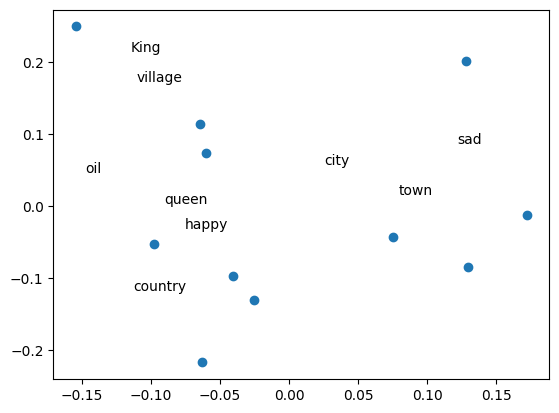

In [68]:
result = compute_pca(X,2)
plt.scatter(result[:,0], result[:,1])
for i , word in enumerate(words):
    plt.annotate(word, xy= (result[i,0] - 0.05, result[i,1]+0.1))

plt .show()